In [13]:
from data_loader import data_reader, colnames, colnames_bid
from matplotlib import pyplot as plt
import math
import pandas as pd
import numpy as np

In [36]:
#DONT FORGET TO LOAD THAT OTHER FUCKING DATASET, I KNOW YOU ARE LAZY
# BUT JUST DONT FORGET IT
# YEAH, SURE, NO PROBLEM
# YOU CAN DO IT LATER
# JUST DONT FORGET IT

imp_19 = data_reader('data\\imp.20131019.txt', colnames, 
                verbose=False, fuck_parsing=True)
bid_19 = data_reader('data\\bid.20131019.txt', colnames_bid, verbose=False, fuck_parsing=True)
clk_19 = data_reader('data\\clk.20131019.txt', colnames, verbose=False, fuck_parsing=True)
conv_19 = data_reader('data\\conv.20131019.txt', colnames, verbose=False, fuck_parsing=True)


imp_20 = data_reader('data\\imp.20131020.txt', colnames, 
                verbose=False, fuck_parsing=True)
bid_20 = data_reader('data\\bid.20131020.txt', colnames_bid, verbose=False, fuck_parsing=True)
clk_20 = data_reader('data\\clk.20131020.txt', colnames, verbose=False, fuck_parsing=True)
conv_20 = data_reader('data\\conv.20131020.txt', colnames, verbose=False, fuck_parsing=True)

In [47]:
imp = imp_19.append(imp_20, ignore_index=True)
bid = bid_19.append(bid_20, ignore_index=True)
clk = clk_19.append(clk_20, ignore_index=True)
conv = conv_19.append(conv_20, ignore_index=True)

In [48]:
bid_rel = bid[['bid_id', 'timestamp']]
imp_rel = imp[['bid_id', 'paying_price']]
# clk_rel = clk[['bid_id', 'paying_price']]
# conv_rel = conv[['bid_id', 'paying_price']]
bids = bid_rel.merge(imp_rel,how='left', on='bid_id').sort_values('timestamp')
bids['not_bought'] = [math.isnan(price) for price in bids.paying_price]
bids.paying_price = bids.paying_price.fillna(0)

In [55]:
def split_explore_exploit(bids, share_exploration):
    N = bids.shape[0]
    this_many = int(share_exploration * N)
    bids_explore = bids.iloc[:this_many, :]
    bids_exploit = bids.iloc[this_many:, :]
    return bids_explore, bids_exploit, N

share_exploration = 0.003
bids_explore, bids_exploit, N = split_explore_exploit(bids, share_exploration)

G = 1e5
B = 6e6
target_price =  B / G
target_winrate = G / N




print(bids_explore.shape)
print(target_price)
print(target_winrate)

(2040, 4)
60.0
0.14702098724592935


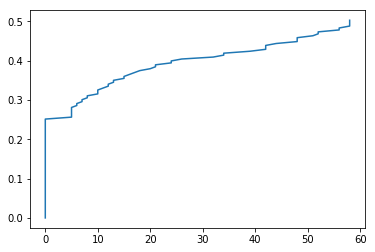

0.5049019607843137
12.932038834951456
doubling


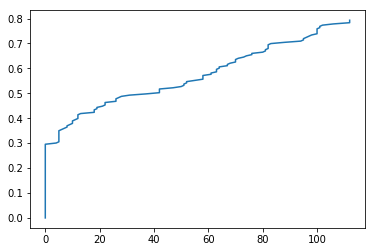

0.7941176470588235
31.574074074074073
doubling


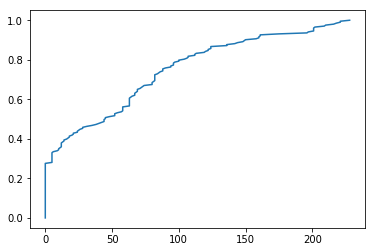

1.0
57.63725490196079
doubling


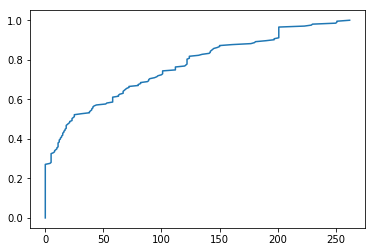

breaking in round 4
E(views): 680175.00 > target_views 100000.00
E(price): 61.27 > target_price 60.00


In [78]:
def explore(bids_explore, target_price, N, rounds=5, plot_win_fct=False):
    bid_price = target_price
    N_expl = bids_explore.shape[0]
    step = int(N_expl / rounds)
    start = 0
    stop = step
    for round in range(rounds):
        won = 0
        cost = 0
        winning_prices = [np.nan] * step
        index=0
        for _, bid in bids_explore \
                            .iloc[start:stop, :] \
                            .iterrows():
            if bid_price > bid.paying_price:
                won += 1
                cost += bid.paying_price
                winning_prices[index] = bid.paying_price
            index += 1
        if plot_win_fct:
            sorted_data = np.sort(winning_prices)
            yvals = np.arange(len(winning_prices))/float(len(winning_prices)-1) #len(winning_prices) = step
            plt.plot(sorted_data, yvals)
            plt.show()
        winrate = won / step
        price = cost / won
        exp_views = N * winrate
        exp_price = cost / step
        
        if  (exp_views < G) or (price < target_price):
            bid_price = bid_price * 2
            print(winrate)
            print(price)
            print('doubling')
        else:
            print('breaking in round %s' % (round + 1))
            print('E(views): %.2f > target_views %.2f' % \
                  (exp_views, G))
            print('E(price): %.2f > target_price %.2f' % \
                  (exp_price, target_price))
            break
        start += step
        stop += step
    return winning_prices
abc = explore(bids_explore, target_price, N, rounds=10, plot_win_fct = True)


In [71]:
np.arange(len(abc)) / float(len(abc) - 1)

array([ 0.        ,  0.002457  ,  0.004914  ,  0.00737101,  0.00982801,
        0.01228501,  0.01474201,  0.01719902,  0.01965602,  0.02211302,
        0.02457002,  0.02702703,  0.02948403,  0.03194103,  0.03439803,
        0.03685504,  0.03931204,  0.04176904,  0.04422604,  0.04668305,
        0.04914005,  0.05159705,  0.05405405,  0.05651106,  0.05896806,
        0.06142506,  0.06388206,  0.06633907,  0.06879607,  0.07125307,
        0.07371007,  0.07616708,  0.07862408,  0.08108108,  0.08353808,
        0.08599509,  0.08845209,  0.09090909,  0.09336609,  0.0958231 ,
        0.0982801 ,  0.1007371 ,  0.1031941 ,  0.10565111,  0.10810811,
        0.11056511,  0.11302211,  0.11547912,  0.11793612,  0.12039312,
        0.12285012,  0.12530713,  0.12776413,  0.13022113,  0.13267813,
        0.13513514,  0.13759214,  0.14004914,  0.14250614,  0.14496314,
        0.14742015,  0.14987715,  0.15233415,  0.15479115,  0.15724816,
        0.15970516,  0.16216216,  0.16461916,  0.16707617,  0.16

In [64]:
len(a)

3

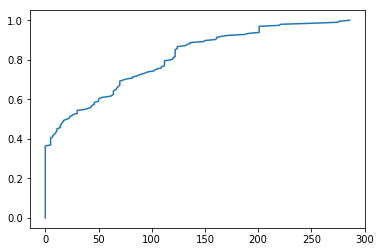

In [26]:
sorted_data = np.sort(abc)
yvals=np.arange(len(abc))/float(len(abc)-1)
plt.plot(sorted_data,yvals)
plt.show()

In [27]:
counts = pd.Series(sorted_data).value_counts(normalize=True, sort=False, dropna=False)
sorted_data=pd.DataFrame(sorted_data)

In [185]:
sorted_data.columns = ['values']

In [204]:

counts=pd.DataFrame(counts)
for_b_B = sorted_data.merge(counts, left_on='values', right_index=True)

In [208]:
for_b_B.columns = ['vals', 'freq']

In [217]:
abc = for_b_B

array([  0.,   5.,   7.,   8.,   9.,  10.,  11.,  14.,  15.,  16.,  17.,
        19.,  22.,  23.,  25.,  26.,  30.,  37.,  40.,  43.,  44.,  46.,
        50.,  51.,  54.,  61.,  63.,  64.,  65.,  67.,  68.,  69.,  70.,
        73.,  76.,  82.,  86.,  88.,  91.,  94.,  96., 102., 103., 105.,
       109., 112., 118., 120., 122., 124., 132., 133., 136., 149., 150.,
       160., 161., 165., 171., 187., 191., 201., 220., 221., 250., 275.,
       276., 286.])